In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/nhandientraicay'

/content/drive/MyDrive/nhandientraicay


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop,SGD
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [5]:
training=train_datagen.flow_from_directory('/content/drive/MyDrive/nhandientraicay/train',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 1019 images belonging to 10 classes.


In [6]:
test=train_datagen.flow_from_directory('/content/drive/MyDrive/nhandientraicay/test',target_size=(150,150),batch_size=20,class_mode="categorical")

Found 180 images belonging to 10 classes.


In [7]:
model=Sequential() 
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                    

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])
history = model.fit(training,batch_size=70,epochs=100,verbose=1,validation_data=test,callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/100
51/51 [==============================] - 226s 4s/step - loss: 2.9733 - accuracy: 0.4024 - val_loss: 0.5353 - val_accuracy: 0.7889
Epoch 2/100
51/51 [==============================] - 12s 226ms/step - loss: 0.7490 - accuracy: 0.7870 - val_loss: 0.5239 - val_accuracy: 0.9000
Epoch 3/100
51/51 [==============================] - 12s 226ms/step - loss: 0.3801 - accuracy: 0.9009 - val_loss: 0.6590 - val_accuracy: 0.7778
Epoch 4/100
51/51 [==============================] - 11s 224ms/step - loss: 0.2192 - accuracy: 0.9264 - val_loss: 0.8435 - val_accuracy: 0.8111
Epoch 5/100
51/51 [==============================] - 12s 226ms/step - loss: 0.2336 - accuracy: 0.9480 - val_loss: 0.8458 - val_accuracy: 0.8278
Epoch 6/100
51/51 [==============================] - 12s 235ms/step - loss: 0.2674 - accuracy: 0.9372 - val_loss: 0.9386 - val_accuracy: 0.7222
Epoch 7/100
51/51 [==============================] - 11s 224ms/step - loss: 0.1217 - accuracy: 0.9607 - val_loss: 0.0305 - val_accuracy: 0

In [9]:
Score=model.evaluate(training,verbose=0)
print('Test Loss', Score[0])
print('Test Accuracy', Score[1])

Test Loss 0.06260479241609573
Test Accuracy 0.9970559477806091


<function matplotlib.pyplot.show>

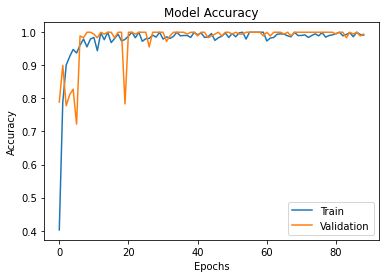

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [11]:
model.save('nhandientraicay.h5')

In [12]:
model_nhandien=load_model('nhandientraicay.h5')

In [13]:
training.class_indices

{'cam': 0,
 'cherry': 1,
 'chuoi': 2,
 'dao': 3,
 'dau tay': 4,
 'dua': 5,
 'dua hau': 6,
 'kiwi': 7,
 'luu': 8,
 'tao': 9}

DUA


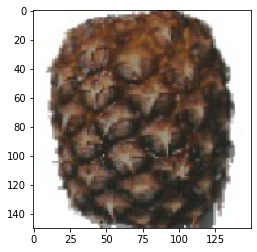

In [14]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/dua/Pineapple_108.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

CHERRY


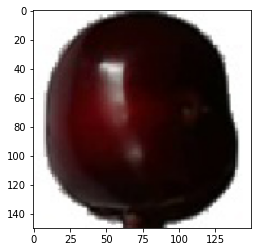

In [15]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/cherry/Cherry_115.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

CAM


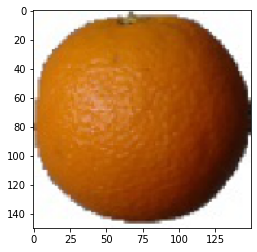

In [16]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/cam/Orange_108.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

DAO


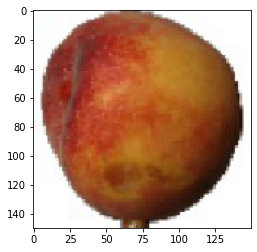

In [17]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/dao/Peach_104.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

CHUOI


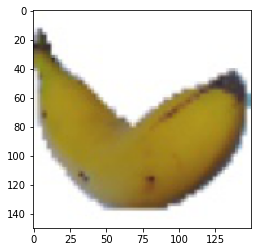

In [18]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/chuoi/Banana_106.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

DAU TAY


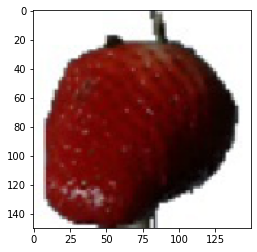

In [19]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/dau tay/Strawberry_104.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

DUA HAU


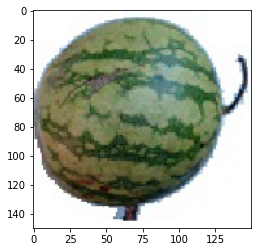

In [20]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/dua hau/Watermelon_108.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

KIWI


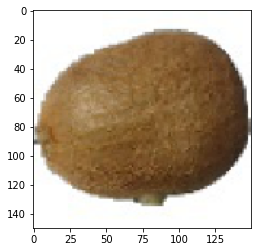

In [21]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/kiwi/Kiwi_109.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

LUU


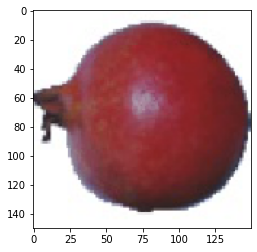

In [22]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/luu/Pomegranate_109.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

TAO


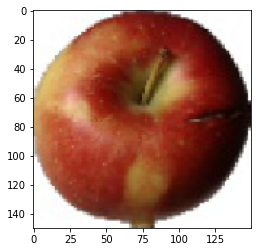

In [23]:
img=load_img('/content/drive/MyDrive/nhandientraicay/test/tao/Apple Braeburn_108.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
a=np.argmax(model_nhandien.predict(img),axis=1)
if a[0]==0:
  print('CAM')
if a[0]==1:
  print('CHERRY')
if a[0]==2:
  print('CHUOI')
if a[0]==3:
  print('DAO')
if a[0]==4:
  print('DAU TAY')
if a[0]==5:
  print('DUA')
if a[0]==6:
  print('DUA HAU')
if a[0]==7:
  print('KIWI')
if a[0]==8:
  print('LUU')
if a[0]==9:
  print('TAO')

In [24]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('nhandientraicay.ipynb')